Hello Quynh!

My name is Dmitry.  I'm glad to review your work today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

<div class="alert alert-info">
<h2> Student's comment</h2>
Megaline has two prepaid plans, Surf and Ultimate. I will analyze both plans based on 500 customers' data, texting, and calling usage and behaviors in 2018 to determine which plan has the most revenue. 

</div>



<font color='red'>


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great start with custom introduction =)
</div>

In [1]:
# Loading all the libraries
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Load data

In [2]:
# Load the data files into different DataFrames
meg_calls = pd.read_csv('/datasets/megaline_calls.csv')
meg_int = pd.read_csv('/datasets/megaline_internet.csv')
meg_mess = pd.read_csv('/datasets/megaline_messages.csv')
meg_plans = pd.read_csv('/datasets/megaline_plans.csv')
meg_users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

In [3]:
meg_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
meg_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [5]:
meg_int.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [6]:
meg_mess.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [7]:
meg_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Plans

In [8]:
# Print the general/summary information about the plans' DataFrame
meg_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [9]:
# Print a sample of data for plans
meg_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [10]:
meg_plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

<div class="alert alert-info">
<h2> Student's comment</h2>
From the printed data, we know there are two plans: surf and ultimate. With the ulitmate plan, it looks like 
customers will get more messages, mb and minutes per month. There are 8 columns included in the plan's dataframe with only 2 entries. 
It seems like there are no missing data or inappropriate data type. 
</div>



<font color='red'>


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
    
Pro tip: it's useful to check for duplicates in initial dataset.
</div>

## Fix data

[Fix obvious issues with the data given the initial observations.]

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [11]:
meg_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


## Users

In [12]:
# Print the general/summary information about the users' DataFrame
meg_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
# Print a sample of data for users
meg_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<div class="alert alert-info">
<h2> Student's comment</h2>

There are 500 users with either the surf or ultimate plan. This dataframe has 8 columns. These columns include name, age, city, plan, and churn date. 
Churn date column has 466 missing values. Eventhough user_id is assigned by numbers, it should be object instead of integer. Regular date and churn date should be datatime dtype. 
</div>



<font color='red'> 


### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [14]:
meg_users['churn_date'].isna().sum()

466

In [15]:
meg_users['churn_date']= meg_users['churn_date'].fillna(0)

In [16]:
meg_users['user_id'] = meg_users['user_id'].astype('object')

In [17]:
meg_users['reg_date'] = pd.to_datetime(meg_users['reg_date'], format='%Y-%m-%d')

In [18]:
meg_users['churn_date'] = pd.to_datetime(meg_users['churn_date'], format='%Y-%m-%d')

In [19]:
meg_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [20]:
meg_users.describe()

,age
count,500.000000
mean,45.486000
std,16.972269
min,18.000000
25%,30.000000
50%,46.000000
75%,61.000000
max,75.000000


## Calls

In [21]:
# Print the general/summary information about the calls' DataFrame
meg_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [22]:
# Print a sample of data for calls
meg_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22



<div class="alert alert-info">
<h2> Student's comment</h2>

In the call's dataframe, there are 137735 entries and 4 columns. There are no missing values. User_id should be object dtype instead of integer. Call_date should be datetime dtype. To change the dtype of object and call_date, we use astype() and to_datetime method, respectively. 
</div>


### Fix data

[Fix obvious issues with the data given the initial observations.]

In [23]:
meg_calls['call_date'] = pd.to_datetime(meg_calls['call_date'], format='%Y-%m-%d')

In [24]:
meg_calls['user_id']=meg_calls['user_id'].astype('object')

In [25]:
meg_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


### Enrich data

In [26]:
meg_calls.describe()

,duration
count,137735.000000
mean,6.745927
std,5.839241
min,0.000000
25%,1.290000
50%,5.980000
75%,10.690000
max,37.600000


## Messages

In [27]:
# Print the general/summary information about the messages' DataFrame
meg_mess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [28]:
# Print a sample of data for messages
meg_mess.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


<div class="alert alert-info">
<h2> Student's comment</h2>

There are 76051 entries with 3 columns. No missing data is noted. User_id should be object dtype and message_date should be datetime dtype. They can be fixed using astype () and to_datetime method. 
</div>



### Fix data

In [29]:
meg_mess['user_id']=meg_mess['user_id'].astype('object')

In [30]:
meg_mess['message_date'] = pd.to_datetime(meg_mess['message_date'], format='%Y-%m-%d')

In [31]:
meg_mess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Enrich data

## Internet

In [32]:
# Print the general/summary information about the internet DataFrame
meg_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [33]:
# Print a sample of data for the internet traffic
meg_int.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<div class="alert alert-info">
<h2> Student's comment</h2>

There are 104835 entries with 4 columns. No missing data is noted. User_id should be object dtype and session_date should be datetime dtype. They can be fixed using astype () and to_datetime method.

</div>


### Fix data

[Fix obvious issues with the data given the initial observations.]

In [34]:
meg_int['user_id'] = meg_int['user_id'].astype('object')

In [35]:
meg_int['session_date'] = pd.to_datetime(meg_int['session_date'], format= '%Y-%m-%d')

In [36]:
meg_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


### Enrich data

In [37]:
meg_int.describe()

,mb_used
count,104825.000000
mean,366.713701
std,277.170542
min,0.000000
25%,136.080000
50%,343.980000
75%,554.610000
max,1693.470000


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job.
</div>

## Study plan conditions

In [38]:
# Print out the plan conditions and make sure they are clear for you
sulf_conditions= '''1. Monthly charge: $20
2. 500 monthly minutes, 50 texts, and 15 GB of data
3. After exceeding the package limits:
    1 minute: 3 cents
    1 text message: 3 cents
    1 GB of data: $10'''
print(sulf_conditions)

1. Monthly charge: $20
2. 500 monthly minutes, 50 texts, and 15 GB of data
3. After exceeding the package limits:
    1 minute: 3 cents
    1 text message: 3 cents
    1 GB of data: $10


In [39]:
ultimate_conditions= '''1. Monthly charge: $70
2. 3000 monthly minutes, 1000 text messages, and 30 GB of data
3. After exceeding the package limits:
    1 minute: 1 cent
    1 text message: 1 cent
    1 GB of data: $7'''
print(ultimate_conditions)

1. Monthly charge: $70
2. 3000 monthly minutes, 1000 text messages, and 30 GB of data
3. After exceeding the package limits:
    1 minute: 1 cent
    1 text message: 1 cent
    1 GB of data: $7


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Wow =)
</div>

In [40]:
meg_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [41]:
# Calculate the number of calls made by each user per month. Save the result.
meg_calls['month'] = meg_calls['call_date'].dt.month
meg_calls_per_user = meg_calls.groupby(['user_id','month']).agg({'id':'count'}).reset_index()
meg_calls_per_user

,user_id,month,id
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [42]:
# Calculate the amount of minutes spent by each user per month. Save the result.
meg_calls['month'] = meg_calls['call_date'].dt.month
meg_mins_month = meg_calls.groupby(['user_id','month']).agg({'duration':'sum'}).reset_index()
meg_mins_month

,user_id,month,duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


In [43]:
# Calculate the number of messages sent by each user per month. Save the result.
meg_mess['month'] = meg_mess['message_date'].dt.month
meg_mess_month = meg_mess.groupby(['user_id','month']).agg({'id':'count'}).reset_index()
meg_mess_month

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [44]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
meg_int['month'] = meg_int['session_date'].dt.month
meg_int_month = meg_int.groupby(['user_id','month']).agg({'mb_used':'sum'}).reset_index()
meg_int_month

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct.
</div>

In [45]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
df=meg_calls_per_user.merge(right=meg_mins_month, on =['user_id','month'], how='outer')
df=df.merge(right=meg_mess_month, on =['user_id','month'], how='outer')
df=df.merge(right=meg_int_month, on =['user_id','month'], how='outer')
df

,user_id,month,id_x,duration,id_y,mb_used
0,1000,12,16.0,116.83,11.0,1901.47
1,1001,8,27.0,171.14,30.0,6919.15
2,1001,9,49.0,297.69,44.0,13314.82
3,1001,10,65.0,374.11,53.0,22330.49
4,1001,11,64.0,404.59,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91
2289,1361,5,NaN,NaN,2.0,1519.69
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,233.17


In [46]:
# Add the plan information
df2 = df.merge(right=meg_users, on=['user_id'], how='outer')
df2

,user_id,month,id_x,duration,id_y,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000.0,12.0,16.0,116.83,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1970-01-01
1,1001.0,8.0,27.0,171.14,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01
2,1001.0,9.0,49.0,297.69,44.0,13314.82,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01
3,1001.0,10.0,65.0,374.11,53.0,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01
4,1001.0,11.0,64.0,404.59,36.0,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307.0,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,1970-01-01
2299,1319.0,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,1970-01-01
2300,1378.0,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,1970-01-01
2301,1463.0,NaN,NaN,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,1970-01-01


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Excellent!
</div>

In [47]:
#changing mb to gb and changing column name 
df2['mb_used'] = df2['mb_used']/1024.00
df2 = df2.rename(columns={'mb_used':'gb_used'})

In [48]:
#replacing NaN with 0
df2 = df2.fillna(0)
df2

,user_id,month,id_x,duration,id_y,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000.0,12.0,16.0,116.83,11.0,1.856904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1970-01-01
1,1001.0,8.0,27.0,171.14,30.0,6.756982,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01
2,1001.0,9.0,49.0,297.69,44.0,13.002754,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01
3,1001.0,10.0,65.0,374.11,53.0,21.807119,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01
4,1001.0,11.0,64.0,404.59,36.0,18.070605,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307.0,0.0,0.0,0.00,0.0,0.000000,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,1970-01-01
2299,1319.0,0.0,0.0,0.00,0.0,0.000000,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,1970-01-01
2300,1378.0,0.0,0.0,0.00,0.0,0.000000,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,1970-01-01
2301,1463.0,0.0,0.0,0.00,0.0,0.000000,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,1970-01-01


In [49]:
#changing id_x and id_y to calls and messages so it would be easier to read 
df2 = df2.rename(columns={'id_x':'calls','id_y':"messages"})
df2

,user_id,month,calls,duration,messages,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000.0,12.0,16.0,116.83,11.0,1.856904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1970-01-01
1,1001.0,8.0,27.0,171.14,30.0,6.756982,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01
2,1001.0,9.0,49.0,297.69,44.0,13.002754,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01
3,1001.0,10.0,65.0,374.11,53.0,21.807119,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01
4,1001.0,11.0,64.0,404.59,36.0,18.070605,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307.0,0.0,0.0,0.00,0.0,0.000000,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,1970-01-01
2299,1319.0,0.0,0.0,0.00,0.0,0.000000,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,1970-01-01
2300,1378.0,0.0,0.0,0.00,0.0,0.000000,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,1970-01-01
2301,1463.0,0.0,0.0,0.00,0.0,0.000000,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,1970-01-01


In [80]:
# Calculate the monthly revenue for each user
def total_revenue(row):
   
    calls_extra = 0
    messages_extra = 0 
    internet_extra = 0
    
    total_revenue = 0
    
    surf_call_limited = 500
    surf_mess_limited = 50
    surf_int_limited = 15
    
    ult_call_limited = 3000
    ult_mess_limited = 1000
    ult_int_limited = 30
    
    
    if row['plan'] == 'surf': 
        total_revenue += 20
        if row['calls'] > surf_call_limited :  
            calls_extra = (row['calls'] - surf_call_limited) * 0.03
        if row['messages'] > surf_mess_limited: 
            messages_extra = (row['messages'] - surf_mess_limited) * 0.03
        if row['gb_used'] > surf_int_limited: 
            internet_extra = (row['gb_used'] - surf_int_limited) * 10
        total_revenue += calls_extra + messages_extra + internet_extra
        
    elif row['plan'] == 'ultimate': 
        total_revenue += 70
        if row['calls'] > ult_call_limited :  
            calls_extra = (row['calls'] - ult_call_limited) * 0.01
        if row['messages'] > ult_mess_limited: 
            messages_extra = (row['messages'] - ult_mess_limited) * 0.01
        if row['gb_used'] > 30: 
            internet_extra = (row['gb_used'] - ult_int_limited) * 7
        total_revenue += calls_extra + messages_extra + internet_extra
    
    return total_revenue

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Uh oh! Something went wrong — let's take a look!    
  
We got all zeros for ultimate plan and a lot of zeros for surf plan. Please check your function.
    
    
Also, it's a good practice do not hardcode values but use variables. We can replace harcoded values with link to cell in plans description.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Much better!
</div>

In [83]:
df2['total_revenue'] = df2.apply(total_revenue, axis= 1)
df2

,user_id,month,calls,duration,messages,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,total_revenue
0,1000.0,12.0,16.0,116.83,11.0,1.856904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1970-01-01,70.000000
1,1001.0,8.0,27.0,171.14,30.0,6.756982,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01,20.000000
2,1001.0,9.0,49.0,297.69,44.0,13.002754,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01,20.000000
3,1001.0,10.0,65.0,374.11,53.0,21.807119,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01,88.161191
4,1001.0,11.0,64.0,404.59,36.0,18.070605,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01,50.706055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307.0,0.0,0.0,0.00,0.0,0.000000,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,1970-01-01,20.000000
2299,1319.0,0.0,0.0,0.00,0.0,0.000000,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,1970-01-01,20.000000
2300,1378.0,0.0,0.0,0.00,0.0,0.000000,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,1970-01-01,20.000000
2301,1463.0,0.0,0.0,0.00,0.0,0.000000,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,1970-01-01,70.000000


## Study user behaviour

### Calls

In [84]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
plan_surf_call = df2[df2['plan']=='surf'].groupby('month')['duration'].mean()
plan_ultimate_call = df2[df2['plan']=='ultimate'].groupby('month')['duration'].mean()
plan_surf_call, plan_ultimate_call


(month
 0.0       0.000000
 1.0     192.840000
 2.0     280.851111
 3.0     310.970000
 4.0     332.380000
 5.0     377.053247
 6.0     407.208866
 7.0     424.523223
 8.0     387.169630
 9.0     390.992062
 10.0    405.692363
 11.0    399.599823
 12.0    447.475283
 Name: duration, dtype: float64,
 month
 0.0       0.000000
 1.0     183.162500
 2.0     379.861429
 3.0     285.701667
 4.0     316.508095
 5.0     383.664828
 6.0     349.811064
 7.0     403.767288
 8.0     397.274789
 9.0     413.287326
 10.0    425.168019
 11.0    420.477559
 12.0    433.012583
 Name: duration, dtype: float64)

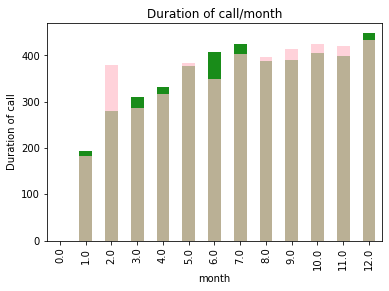

In [85]:
plan_surf_call.plot(kind='bar', alpha= 0.90, ylabel = 'Duration of call', title='Duration of call/month', color = 'green')
plan_ultimate_call.plot(kind='bar', alpha = 0.70, ylabel = 'Duration of call', color = 'pink')

plt.show()

In [86]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
surf_min = df2[df2['plan']=='surf'].groupby('month')['duration'].sum()
ultimate_min = df2[df2['plan']=='ultimate'].groupby('month')['duration'].sum()
surf_min, ultimate_min

(month
 0.0          0.00
 1.0        385.68
 2.0       2527.66
 3.0       7152.31
 4.0      16619.00
 5.0      29033.10
 6.0      39499.26
 7.0      51367.31
 8.0      62721.48
 9.0      75852.46
 10.0     96149.09
 11.0    113086.75
 12.0    142297.14
 Name: duration, dtype: float64,
 month
 0.0         0.00
 1.0       732.65
 2.0      2659.03
 3.0      3428.42
 4.0      6646.67
 5.0     11126.28
 6.0     16441.12
 7.0     23822.27
 8.0     28206.51
 9.0     35542.71
 10.0    45067.81
 11.0    53400.65
 12.0    65384.90
 Name: duration, dtype: float64)

<AxesSubplot:title={'center':'# of minutes used'}, xlabel='month', ylabel='# of minutes'>

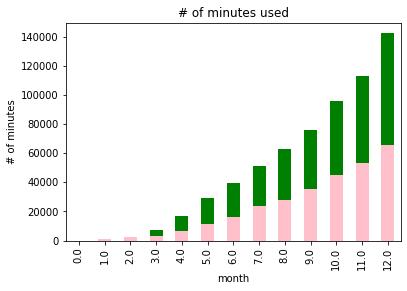

In [87]:
surf_min.plot(kind='bar', ylabel= '# of minutes', color = 'green', label="Surf", title = "# of minutes used" )
ultimate_min.plot(kind='bar', ylabel= '# of minutes', color = 'pink', label ='Ultimate')



In [88]:
# Calculate the mean and the variance of the monthly call duration
print('S_mean:',plan_surf_call.mean())
print('S_variance:',np.var(plan_surf_call))

print('U_mean:',plan_ultimate_call.mean())
print('U_variance:',np.var(plan_ultimate_call))

S_mean: 335.1350467445505
S_variance: 13740.435171284851
U_mean: 337.82285731123596
U_variance: 14025.202948493285


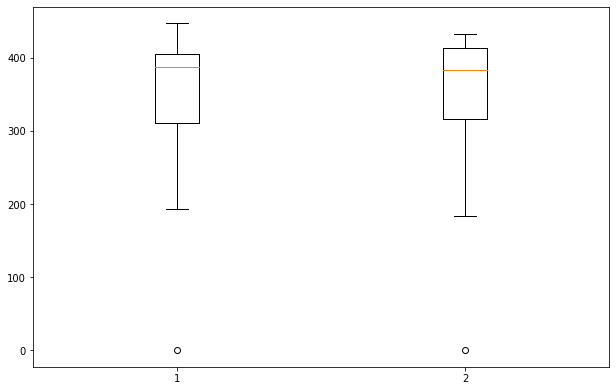

In [89]:
# Plot a boxplot to visualize the distribution of the monthly call duration
data=[plan_surf_call, plan_ultimate_call]
fig = plt.figure(figsize =(8,5))
ax = fig.add_axes([0,0,1,1])
bp= ax.boxplot(data)
plt.show()

<div class="alert alert-info">
<h2> Student's comment</h2>

From both Surf and Ultimate plans, the highest average duration of calls are seen in October, November, and Decemeber. But highest average for the ultimate plan is in February. The ultimate plan has a higher total minutes for all months; double the surf plan. It has a slightly higher mean and variance. Both have similar behavior. 



<font color='red'> 

### Messages

In [90]:
# Compare the number of messages users of each plan tend to send each month
plan_surf_mess = df2[df2['plan']=='surf'].groupby('month')['messages'].mean()
plan_ultimate_mess= df2[df2['plan']=='ultimate'].groupby('month')['messages'].mean()
plan_surf_mess,plan_ultimate_mess

(month
 0.0      0.000000
 1.0     10.500000
 2.0     12.000000
 3.0     15.260870
 4.0     17.400000
 5.0     24.012987
 6.0     25.298969
 7.0     27.033058
 8.0     28.777778
 9.0     30.762887
 10.0    33.839662
 11.0    32.385159
 12.0    38.600629
 Name: messages, dtype: float64,
 month
 0.0      0.000000
 1.0     15.500000
 2.0     21.571429
 3.0     20.250000
 4.0     22.047619
 5.0     32.103448
 6.0     29.340426
 7.0     32.830508
 8.0     38.478873
 9.0     37.895349
 10.0    39.443396
 11.0    38.606299
 12.0    45.006623
 Name: messages, dtype: float64)

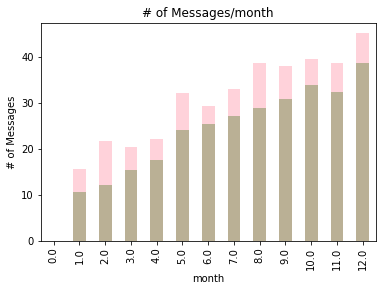

In [91]:
plan_surf_mess.plot(kind='bar', alpha= 0.90, ylabel = '# of Messages', title='# of Messages/month', color = 'green')
plan_ultimate_mess.plot(kind='bar', alpha = 0.70, ylabel = '# of Messages', color = 'pink')

plt.show()

In [92]:
print('S_mean:',plan_surf_mess.mean())
print('S_variance:',np.var(plan_surf_mess))

print('U_mean:',plan_ultimate_mess.mean())
print('U_variance:',np.var(plan_ultimate_mess))

S_mean: 22.759384482000048
S_variance: 112.45636079133693
U_mean: 28.697997687201276
U_variance: 142.54614789616377


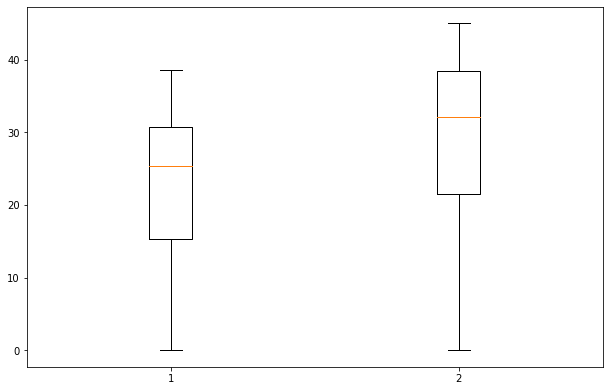

In [93]:
data=[plan_surf_mess, plan_ultimate_mess]
fig = plt.figure(figsize =(8,5))
ax = fig.add_axes([0,0,1,1])
bp= ax.boxplot(data)
plt.show()

<div class="alert alert-info">
<h2> Student's comment</h2>
Both plans display similar behavior, because both average number of messages increase as they move further along in the year. Making January has the lowest number of average texts and Decemeber the highest. The Ultimate plan does have a higher texting average than the surf plan. 
</div>



<font color='red'> 

### Internet

In [94]:
# Compare the amount of internet traffic consumed by users per plan
plan_surf_int = df2[df2['plan']=='surf'].groupby('month')['gb_used'].sum()
plan_ultimate_int = df2[df2['plan']=='ultimate'].groupby('month')['gb_used'].sum()
plan_surf_int, plan_ultimate_int

(month
 0.0        0.000000
 1.0        9.521211
 2.0      107.040615
 3.0      299.751094
 4.0      585.166162
 5.0     1047.948564
 6.0     1449.461260
 7.0     1983.218428
 8.0     2657.073906
 9.0     3143.298506
 10.0    4006.627354
 11.0    4515.633789
 12.0    5630.981699
 Name: gb_used, dtype: float64,
 month
 0.0        0.000000
 1.0       27.023799
 2.0      117.091465
 3.0      214.705293
 4.0      330.619873
 5.0      470.810537
 6.0      703.986611
 7.0      941.738203
 8.0     1235.200322
 9.0     1425.203887
 10.0    1823.174473
 11.0    2112.576211
 12.0    2701.955049
 Name: gb_used, dtype: float64)

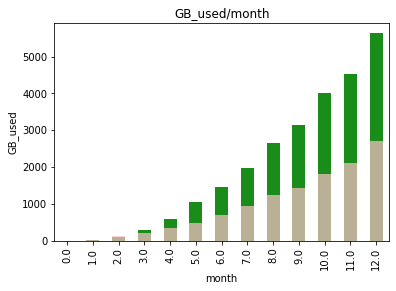

In [95]:
plan_surf_int.plot(kind='bar', alpha= 0.90, ylabel = 'GB_used', title='GB_used/month', color = 'green')
plan_ultimate_int.plot(kind='bar', alpha = 0.70, ylabel = 'GB_used', color = 'pink')

plt.show()

In [96]:
print('S_mean:', plan_surf_int.mean())
print('S_variance:', np.var(plan_surf_int))

print('U_mean:', plan_ultimate_int.mean())
print('U_variance:', np.var(plan_ultimate_int))

S_mean: 1956.5940452223554
S_variance: 3300081.386482492
U_mean: 931.0835171274036
U_variance: 703730.3733358042


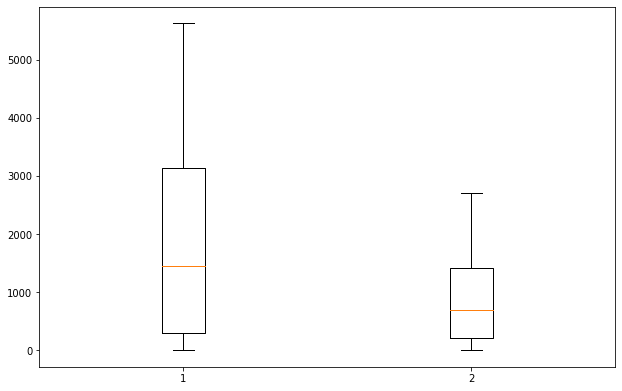

In [97]:
data=[plan_surf_int, plan_ultimate_int]
fig = plt.figure(figsize =(8,5))
ax = fig.add_axes([0,0,1,1])
bp= ax.boxplot(data)
plt.show()

<div class="alert alert-info">
<h2> Student's comment</h2>

The surf plan has more GB used for most months than the ultimate plan. Lowest usage is in January and highest in December for both. Surf plan mean is double the ultimate plan. The behavior is similar as they have similar lowest and highest month and the usage increases later in the year.  
</div>



<font color='red'> 

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [100]:
surf_revenue = df2[df2['plan']=='surf'].groupby('month')['total_revenue'].mean()
ultimate_revenue = df2[df2['plan']=='ultimate'].groupby('month')['total_revenue'].mean()
surf_revenue, ultimate_revenue

(month
 0.0     20.000000
 1.0     20.000000
 2.0     32.107222
 3.0     43.022875
 4.0     37.974985
 5.0     44.080927
 6.0     44.665073
 7.0     57.425198
 8.0     59.356516
 9.0     53.810660
 10.0    60.226683
 11.0    53.556409
 12.0    64.281424
 Name: total_revenue, dtype: float64,
 month
 0.0     70.000000
 1.0     70.000000
 2.0     70.000000
 3.0     73.392448
 4.0     72.771377
 5.0     70.515720
 6.0     71.476980
 7.0     71.850414
 8.0     72.680102
 9.0     71.812310
 10.0    72.091689
 11.0    71.601204
 12.0    73.045714
 Name: total_revenue, dtype: float64)

<AxesSubplot:title={'center':'Monthly Revenue'}, xlabel='month', ylabel='Money'>

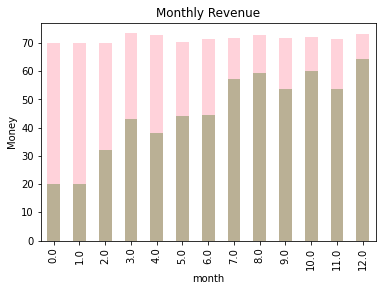

In [101]:
surf_revenue.plot(kind='bar', alpha= 0.90, ylabel = 'Money', title='Monthly Revenue', color = 'green')
ultimate_revenue.plot(kind='bar', alpha = 0.70, ylabel = 'Money', color = 'pink')

<div class="alert alert-info">
<h2> Student's comment</h2>

From the given data, it looks like the ultimate plan makes the has the highest total revenue, with at least $70 per month while the most the surf plan has made is 64.28. However, customers with the surf plan are likely to exceed their monthly plan limitations, especially during the end of the year (Oct, Nov, Dec). 
</div>



<font color='red'> 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Seems we have a mistake in calculating revenue from utlimate plan. Business can't do smth without a revenue)
    
Also, it will be nice to see graphs here too.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice graphs and good conclusion!
</div>

## Test statistical hypotheses

In [106]:
# Test the hypotheses
alpha = 0.05 

results = st.ttest_ind(surf_revenue,ultimate_revenue)

print('p-value:', results.pvalue)

if results.pvalue <alpha: 
    print('We reject the null hypothesis')
else: 
    print('We cant reject the null hypothesis')

p-value: 1.2245262468080199e-06
We reject the null hypothesis


<div class="alert alert-info">
<h2> Student's comment</h2>

We reject the null hypothesis meaning there is a no difference in the average revenue between the Ultimate and Surf calling plans. 



<font color='red'> 

In [107]:
df2['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [108]:
# Test the hypotheses
alpha=0.05

NY_NJ_area = df2[df2['city'].str.contains('NY-NJ')==True].groupby('total_revenue').mean().all()
other_regions = df2[df2['city'].str.contains('NY-NJ')==False].groupby('total_revenue').mean().all()

results = st.ttest_ind(NY_NJ_area, other_regions)

print('p-value:', results.pvalue)

if results.pvalue <alpha: 
    print('We reject the null hypothesis')
else: 
    print('We cant reject the null hypothesis')

p-value: 0.6261174762253241
We cant reject the null hypothesis


<div class="alert alert-info">
<h2> Student's comment</h2>

We cannot reject the null hypothesis meaning there is a difference in the average revenue from users in NY-NJ compare to other regions.


<font color='red'> 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done.
</div>

<div class="alert alert-info">
<h2> Student's comment</h2>
From the gathered data, Ultimate plan has the higher numbers in call of durations and messages. While the Surf plan has higher usage with data. January has the lowest, calling, texting, and surfing for both plans and December is one of the highest. Eventhough there are differences in all three categories, there is no difference in average revenue from users of the Ultimate and Surf calling plans, which was determined by a hypothesis test.  


<font color='red'> 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good final conclusion!
</div>

<div class="alert alert-block alert-warning">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

Quynh, thank you for sending your project. You've done a really good job on it! <br>
    
I really like your work! <br>
There are a lot of correct conclusions and nice code. <br>
    
However, there are some issues. I wrote comments. Please elaborate them.
    
<span class="text-danger"> Do not foreget to rerun whole project and check your findings after fixing! </span>

    
You have very good analytic skills, keep up the good work! I will be waiting for your corrected project.
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment v2</b> <a class="tocSkip"></a>

Your corrections look great, you've improved your work significantly!
    
Your project has been accepted and you can go to the next sprint.
</div>